In [375]:
import pandas as pd
import matplotlib.pyplot as plt

In [376]:
df = pd.read_csv("data/final_data_one_hot.csv")
df.head(3)

,runtime,audience_rating,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,...,production990,production991,production992,production993,production994,production995,production996,production997,production998,production999
0,119.0,53.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,90.0,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,109.0,37.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [377]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=69)

In [378]:
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer
# import ast
# import numpy as np
# from sklearn.preprocessing import MultiLabelBinarizer


# model = LinearRegression()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# print(r2)


In [379]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix

# model = LogisticRegression()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print(accuracy_score(y_pred, y_test))
# print(confusion_matrix(y_pred, y_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error


errors = []
for k in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)


  mae = mean_absolute_error(y_test, y_pred)
  errors.append(mae)

[np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.float64(17.707334273624824), np.floa

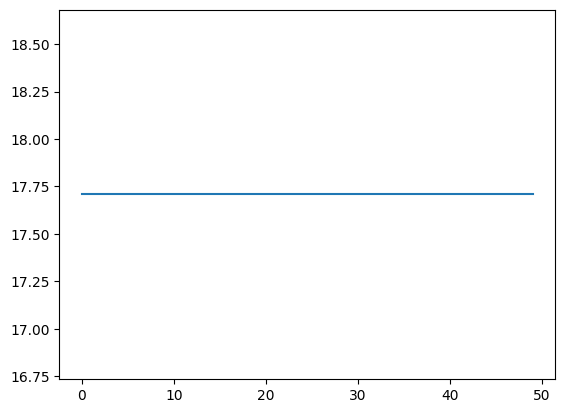

In [ ]:
print(errors)
plt.plot(range(1, 50), errors)

In [ ]:
data = {
  'name': 'A Minecraft Movie',
  'directors': ['Jared Hess'],
  'actors': ['Jack Black',
             'Emma Myers', 
             'Jemaine Clement',
             'Jason Momoa',
             'Jennifer Coolidge'
             'Kate McKinnon',
             'Danielle Brooks',
             'Sebastian Hansen'
            ],
  'production_company': 'Warner Bros. Pictures', # it looks like production company is actually the distributor
  'genres': ['Kids & Family', 'Action & Adventure', 'Science Fiction & Fantasy'],
  'content_rating': 'PG-13', # not final but likely
  'runtime': '100', # runtime not released yet, so use average
}

In [ ]:
import json

with open('data/director_encoding.json', 'r') as file:
    director_encoding = json.load(file)

with open('data/actor_encoding.json', 'r') as file:
    actor_encoding = json.load(file)

with open('data/production_company_encoding.json', 'r') as file:
    production_company_encoding = json.load(file)

columns = df.drop('audience_rating', axis=1).columns

def encode(data):

  new_row = {}

  if 'directors' in data:
    for director in data['directors']:
      if director in director_encoding:
        encoding = director_encoding[director]
        new_row[f'director{encoding}'] = 1

  if 'actors' in data:
    for actor in data['actors']:
      if actor in actor_encoding:
        encoding = actor_encoding[actor]
        new_row[f'actor{encoding}'] = 1

  if 'production_company' in data:
    production_company = data['production_company']
    if production_company in production_company_encoding:
      encoding = production_company_encoding[production_company]
      new_row[f'production{encoding}'] = 1
  
  if 'genres' in data:
    for genre in data['genres']:
      if genre in columns:
        new_row[genre] = 1

  if 'content_rating' in data:
    content_rating = data['content_rating']
    if content_rating in columns:
      new_row[content_rating] = 1

  if 'runtime' in data:
     new_row['runtime'] = data['runtime']

  print(new_row)
  new_row = pd.DataFrame(new_row, index=[0])
  new_row = new_row.reindex(columns=columns, fill_value=0)

  return new_row
    
  # df = pd.concat([new_df, new_row], ignore_index=True)

new_data = encode(data)

new_data

{'director281': 1, 'actor102': 1, 'actor769': 1, 'production1': 1, 'Kids & Family': 1, 'Action & Adventure': 1, 'Science Fiction & Fantasy': 1, 'PG-13': 1, 'runtime': '100'}


,runtime,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,Anime & Manga,...,production990,production991,production992,production993,production994,production995,production996,production997,production998,production999
0,100,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_pred = knn.predict(new_data)

new_pred

array([55.])